# Clean and Analyze Employee Exit Surveys

**In this project, I'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found here and the survey for the DETE can be found here.**

**I'll pretend that stakeholders want me to combine the results for both surveys to answer the following question:**

**Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tafe=pd.read_csv('tafe_survey.csv')
dete=pd.read_csv('dete_survey.csv')

tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [2]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**In order to unify following datasets, in next steps i will:**
* replace 'Not Stated' values for NaN values*
* drop irrelevant columns in both datasets
* standardize column names


In [3]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [4]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.shape

(822, 35)

In [5]:
tafe_survey_updated=tafe.drop(tafe.columns[17:66],axis=1)
tafe_survey_updated.shape

(702, 23)

In [6]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
col_names={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated=tafe_survey_updated.rename(col_names,axis=1)

In [8]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Separating only Resignations category in separationtype column, beacause thats the main subject of analysis:** 

In [9]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
dete_resignations=dete_survey_updated.copy()
tafe_resignations=tafe_survey_updated.copy()

In [11]:
resignations_d=dete_resignations['separationtype'].str.contains('Resignation',na=False)
dete_resignations=dete_resignations[resignations_d]

In [12]:
resignations_t=tafe_resignations['separationtype'].str.contains('Resignation',na=False)
tafe_resignations=tafe_resignations[resignations_t]

In [13]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Checking the years in each dataframe for logical inconsistencies**

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

* i'm only interested in years so i extract only years from 'cease_date' column:

In [16]:
dete_resignations['cease_date']

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
        ...   
747    01/2014
751    12/2013
752    11/2013
753    11/2013
755    12/2013
762    07/2006
766    01/2014
769    11/2013
770        NaN
771    01/2014
774        NaN
784    10/2013
786    01/2014
788        NaN
789    01/2014
790    01/2014
791        NaN
794    11/2013
797        NaN
798        NaN
802    12/2013
803    01/2014
804    01/2014
806    12/2013
807    12/2013
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")


In [18]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [19]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [20]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


** Since i want to answear the following question: **
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer? 

I need to create a new column for dete_resignation containng the work period of an employee

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(x):
    if x=='-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(update_vals).any(1,skipna=False)
dete_resignations['dissatisfied']=dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1,skipna=False)

dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [25]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

*Creating a copy of the results to avoid the SettingWithCopy Warning

In [26]:
dete_resignations_up=tafe_resignations.copy()
tafe_resignations_up=dete_resignations.copy()

** To recap, untill this point I've accomplished the following:**

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

**Next, im going to combine both datasets and aggregate data according to institute_service column**

In [27]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

**To make the data more readable i will drop columns with less than 500 nonNaN values** 

In [28]:
combined_updated=combined.dropna(thresh=500,axis=1)

In [29]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,NaN,2010.0,False,NaN,NaN,6.341399e+17,DETE,NaN,NaN,Resignation
1,41 45,2010.0,False,Permanent Full-time,Male,6.341466e+17,DETE,3-4,Teacher (including LVT),Resignation
2,56 or older,2010.0,False,Contract/casual,Female,6.341475e+17,DETE,7-10,Teacher (including LVT),Resignation
3,20 or younger,2010.0,False,Temporary Full-time,Male,6.341520e+17,DETE,3-4,Administration (AO),Resignation
4,46 50,2010.0,False,Permanent Full-time,Male,6.341537e+17,DETE,3-4,Teacher (including LVT),Resignation
5,36 40,2009.0,False,Temporary Full-time,Female,6.341579e+17,DETE,3-4,Tutor,Resignation
6,21 25,2010.0,False,Permanent Full-time,Female,6.341588e+17,DETE,1-2,Administration (AO),Resignation
7,41 45,2010.0,False,Temporary Part-time,Female,6.341588e+17,DETE,Less than 1 year,Administration (AO),Resignation
8,31 35,2010.0,False,Temporary Full-time,Female,6.341725e+17,DETE,11-20,Administration (AO),Resignation
9,31 35,2010.0,True,Permanent Part-time,Female,6.341726e+17,DETE,7-10,Teacher (including LVT),Resignation


**Let's categorize the values in the institute_service column using the definitions below:**

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [30]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts().sort_index(0)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

In [31]:
def category(x):
    if pd.isnull(x):
        return np.nan
    elif x>=3 and x<=6:
        return 'Experienced'
    elif x>=7 and x<=10:
        return 'Established'
    elif x>=11:
        return 'Veteran'
    else:
        return 'New'
    
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(category)
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [32]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [34]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



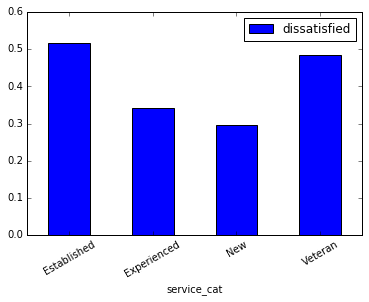

In [36]:
dis_pct=combined_updated.pivot_table(index='service_cat',values='dissatisfied')

%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

**Expanding the analysis:**

* Aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?

* Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?

* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [41]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,NaN,2010.0,False,NaN,NaN,6.341399e+17,DETE,NaN,NaN,Resignation,NaN,NaN
1,41 45,2010.0,False,Permanent Full-time,Male,6.341466e+17,DETE,3-4,Teacher (including LVT),Resignation,3.0,Experienced
2,56 or older,2010.0,False,Contract/casual,Female,6.341475e+17,DETE,7-10,Teacher (including LVT),Resignation,7.0,Established
3,20 or younger,2010.0,False,Temporary Full-time,Male,6.341520e+17,DETE,3-4,Administration (AO),Resignation,3.0,Experienced
4,46 50,2010.0,False,Permanent Full-time,Male,6.341537e+17,DETE,3-4,Teacher (including LVT),Resignation,3.0,Experienced
5,36 40,2009.0,False,Temporary Full-time,Female,6.341579e+17,DETE,3-4,Tutor,Resignation,3.0,Experienced
6,21 25,2010.0,False,Permanent Full-time,Female,6.341588e+17,DETE,1-2,Administration (AO),Resignation,1.0,New
7,41 45,2010.0,False,Temporary Part-time,Female,6.341588e+17,DETE,Less than 1 year,Administration (AO),Resignation,1.0,New
8,31 35,2010.0,False,Temporary Full-time,Female,6.341725e+17,DETE,11-20,Administration (AO),Resignation,11.0,Veteran
9,31 35,2010.0,True,Permanent Part-time,Female,6.341726e+17,DETE,7-10,Teacher (including LVT),Resignation,7.0,Established


* How many people in each career stage resigned due to some kind of dissatisfaction?

In [45]:
dissatisfied=combined_updated[combined_updated['dissatisfied']==True]
dissatisfied['service_cat'].value_counts()

Veteran        66
Experienced    59
New            57
Established    32
Name: service_cat, dtype: int64

* How many people in each age group resgined due to some kind of dissatisfaction?

In [54]:
dissatisfied['age'].value_counts()

51-55            30
41-45            23
26-30            20
46-50            19
31-35            16
36-40            16
56-60            15
46  50           12
61 or older      12
41  45           12
21  25           10
36  40            9
21-25             9
26  30            8
31  35            7
56 or older       6
20 or younger     2
Name: age, dtype: int64

In [57]:
dissatisfied['age'].str.replace('  ','-').value_counts().sort_index()

20 or younger     2
21-25            19
26-30            28
31-35            23
36-40            25
41-45            35
46-50            31
51-55            30
56 or older       6
56-60            15
61 or older      12
Name: age, dtype: int64

* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [61]:
dete_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

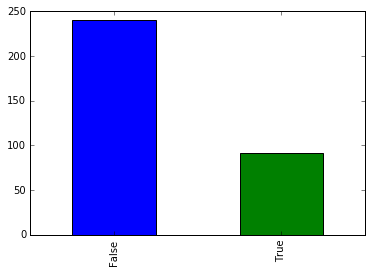

In [76]:
dete_resignations_up['dissatisfied'].value_counts().plot(kind='bar')
plt.show()

In [75]:
tafe_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

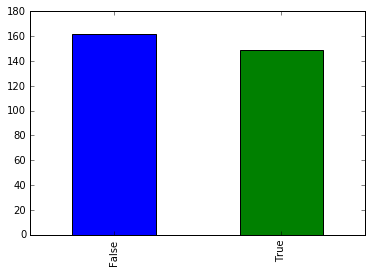

In [74]:
tafe_resignations_up['dissatisfied'].value_counts().plot(kind='bar')
plt.show()